In [7]:
#Import relevant libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

Matplotlib is building the font cache; this may take a moment.


In [10]:
#Importing the Benin data,.
print(os.getcwd())
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis') 
print(os.getcwd())
df = pd.read_csv(r'data\benin-malanville.csv')
# Display the first few rows of the dataset 
df.head()

C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis
C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [11]:
# Understand the shape 
df.shape

(525600, 19)

In [12]:
# Overview of the varbiables
df.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [13]:
#columns in the dataset.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [14]:
#  data types of columns.
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [15]:
# A general description of the dataset.
df
.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

In [22]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = df[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [23]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [24]:
# overview of the data types.
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
Cleaning                  int64
WD                      float64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object

In [19]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [20]:
# look for missing values.
df.isna().sum()
#no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [27]:
#check for duplicated values. 
df.loc[df.duplicated()]
#values are duplicated.

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, Cleaning, WD, Precipitation, TModA, TModB]
Index: []

In [28]:
#a summary statistics
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000       4.500000       4.300000      28.000000   
75%       216.300000     463.700000     447.900000      32.300000   
max       759.200000    1342.300000    1342.300000      43.800000   
std       158.691074     326.894859     316.536515       5.924297   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       54.487969       2.121113       2.809195       0.473390   
min         2.100000       0.000000       0.000000       0.000000   
25%        28.800000       1.000000       1.300000       0.400000   
50%        55.100000       1.900000       2.600000       0.500000   
75%        80.100000       3.100000       4.100000       0.600000   
max       100.000000      19.500000      26.600000       4.200000   
std        28.073069       1.603466       2.029120       0.273395   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000923     153.435172       0.001905      35.246026   
min         0.000000       0.000000       0.000000       9.000000   
25%         0.000000      59.000000       0.000000      24.200000   
50%         0.000000     181.000000       0.000000      30.000000   
75%         0.000000     235.100000       0.000000      46.900000   
max         1.000000     360.000000       2.500000      81.000000   
std         0.030363     102.332842       0.037115      14.807258   

               TModB  
count  525600.000000  
mean       32.471736  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000  
std        12.348743

In [30]:
#check for the existence of outliers using Z-score method 
from scipy.stats import zscore  # Import the zscore function
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 1
Number of outliers in DNI: 0
Number of outliers in DHI: 1932
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in Tamb: 0
Number of outliers in RH: 0
Number of outliers in WS: 1133
Number of outliers in WSgust: 828
Number of outliers in WSstdev: 0
Number of outliers in Cleaning: 0
Number of outliers in WD: 0
Number of outliers in Precipitation: 2387
Number of outliers in TModA: 0
Number of outliers in TModB: 11
Number of remaining outliers after replacement: 1519


In [31]:
#there are some outliers still left in some columns so  try to remove these remaining outliers.
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 0
Number of outliers in DNI: 0
Number of outliers in DHI: 1030
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in WD: 0
Number of remaining outliers after replacement: 607


In [33]:
#change on the values after removing the outliers
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.340468     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     482.900000     314.200000   
max              2022-08-09 00:00:00    1232.000000     952.300000   
std                              NaN     330.865639     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      107.662768     236.524528     228.737160      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         0.500000       4.500000       4.300000      28.000000   
75%       206.100000     463.600000     447.600000      32.300000   
max       559.900000    1215.000000    1177.000000      43.800000   
std       149.098283     326.815176     316.357415       5.924297   

                  RH             WS         WSgust        WSstdev  Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000  525600.0   
mean       54.487969       2.071892       2.743631       0.462676       0.0   
min         2.100000       0.000000       0.000000       0.000000       0.0   
25%        28.800000       1.000000       1.300000       0.400000       0.0   
50%        55.100000       1.900000       2.400000       0.500000       0.0   
75%        80.100000       3.000000       3.900000       0.600000       0.0   
max       100.000000       6.600000       8.400000       1.200000       0.0   
std        28.073069       1.506107       1.898486       0.249952       0.0   

                  WD  Precipitation          TModA          TModB  
count  525600.000000       525600.0  525600.000000  525600.000000  
mean      153.435172            0.0      35.245072      32.463127  
min         0.000000            0.0       9.000000       8.100000  
25%        59.000000            0.0      24.200000      23.600000  
50%       181.000000            0.0      30.000000      28.900000  
75%       235.100000            0.0      46.900000      41.500000  
max       360.000000            0.0      79.600000      69.400000  
std       102.332842            0.0      14.805982      12.336751

In [ ]:
Analysis
Time series analysis
After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months. We proceed with the time series analysis by using line graphs of the key metircs(variables mentioned).

In [34]:
# Overview of the relevant columns
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


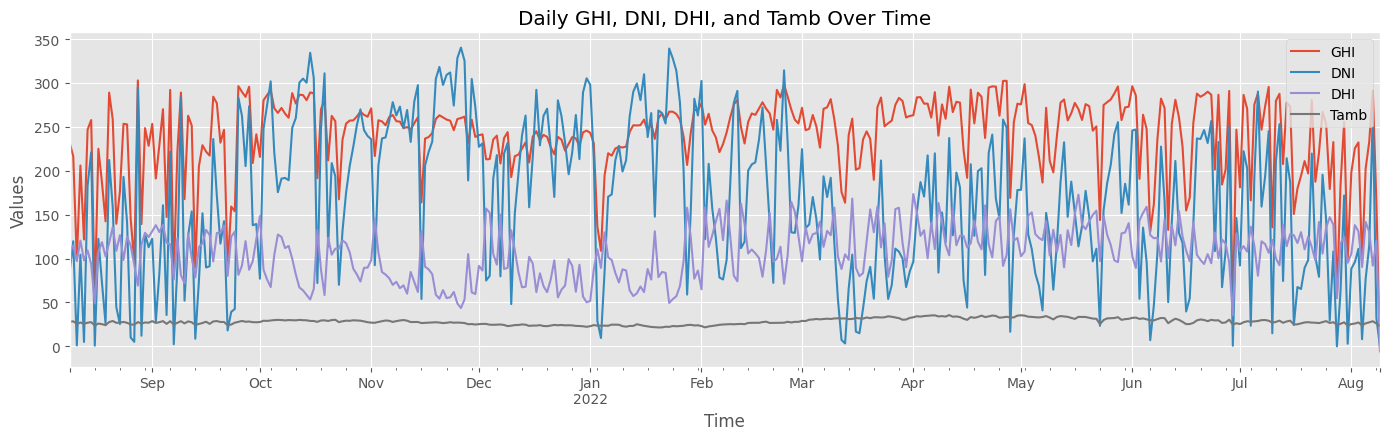

In [42]:


# Assuming the DataFrame df is already loaded and 'Timestamp' is set as the index

# Resample the data by day or month to observe patterns
df_daily = df.resample('D').mean()
df_monthly = df.resample('ME').mean()  # Use 'ME' for end of month resampling

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()


evaluate the impact of cleaning on the two sensors(ModA and ModB) by using the cleaning column.

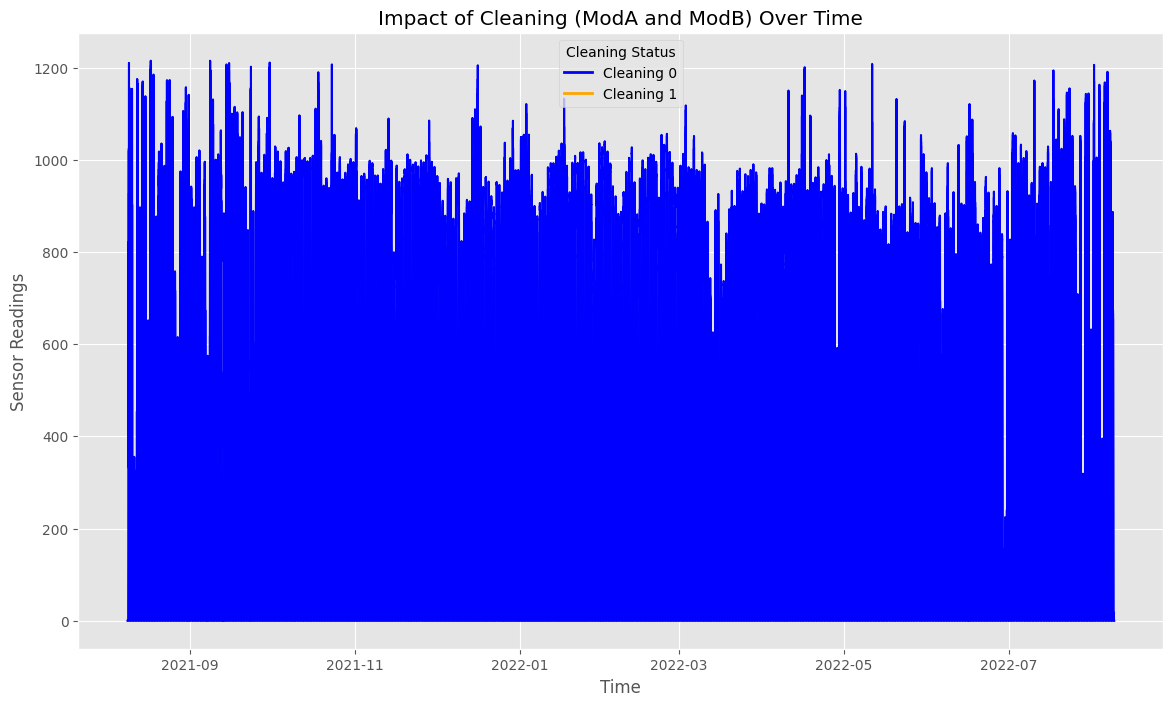

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Define a custom color palette
custom_palette = {
    0: 'blue',    # Color for Cleaning status 0
    1: 'orange',  # Color for Cleaning status 1
}

# Plot ModA sensor readings over time, colored by the 'Cleaning' column
plot1 = sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette=custom_palette, linewidth=1.5, legend=False)

# Plot ModB sensor readings over time, colored by the 'Cleaning' column
plot2 = sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette=custom_palette, linewidth=1.5, legend=False)

# Add titles and labels
plt.title('Impact of Cleaning (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.grid(True)

# Create a custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='orange', lw=2)]

plt.legend(custom_lines, ['Cleaning 0', 'Cleaning 1'], title='Cleaning Status')

# Show the plot
plt.show()








Correlational analysis
The next line of code is correlational analysis by using heatmaps and pairplots in order to visualize the correaltion between key metrics in the solar radiation side(GHI, DNI , DHI) and temprature side(TModA and TModB).

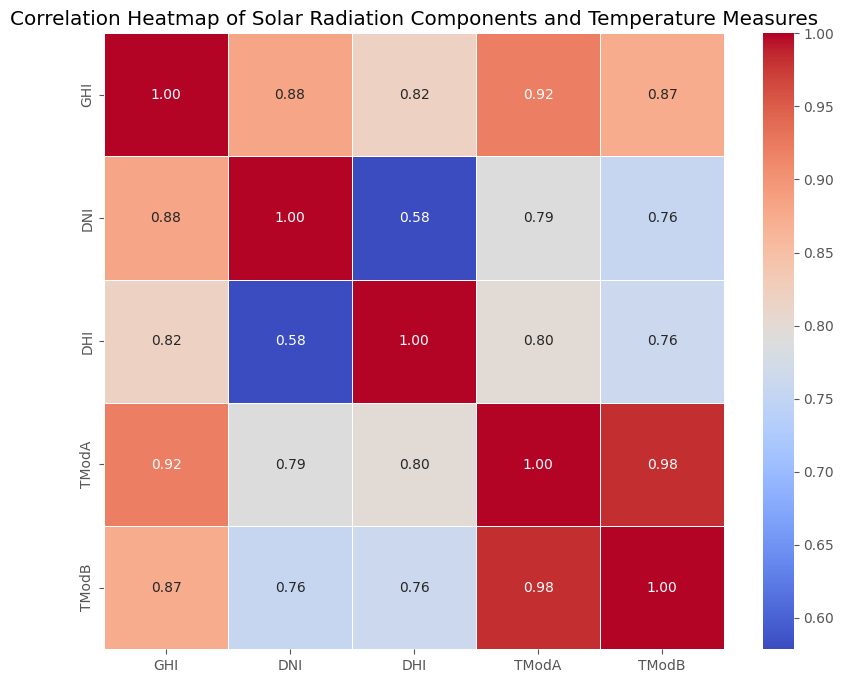

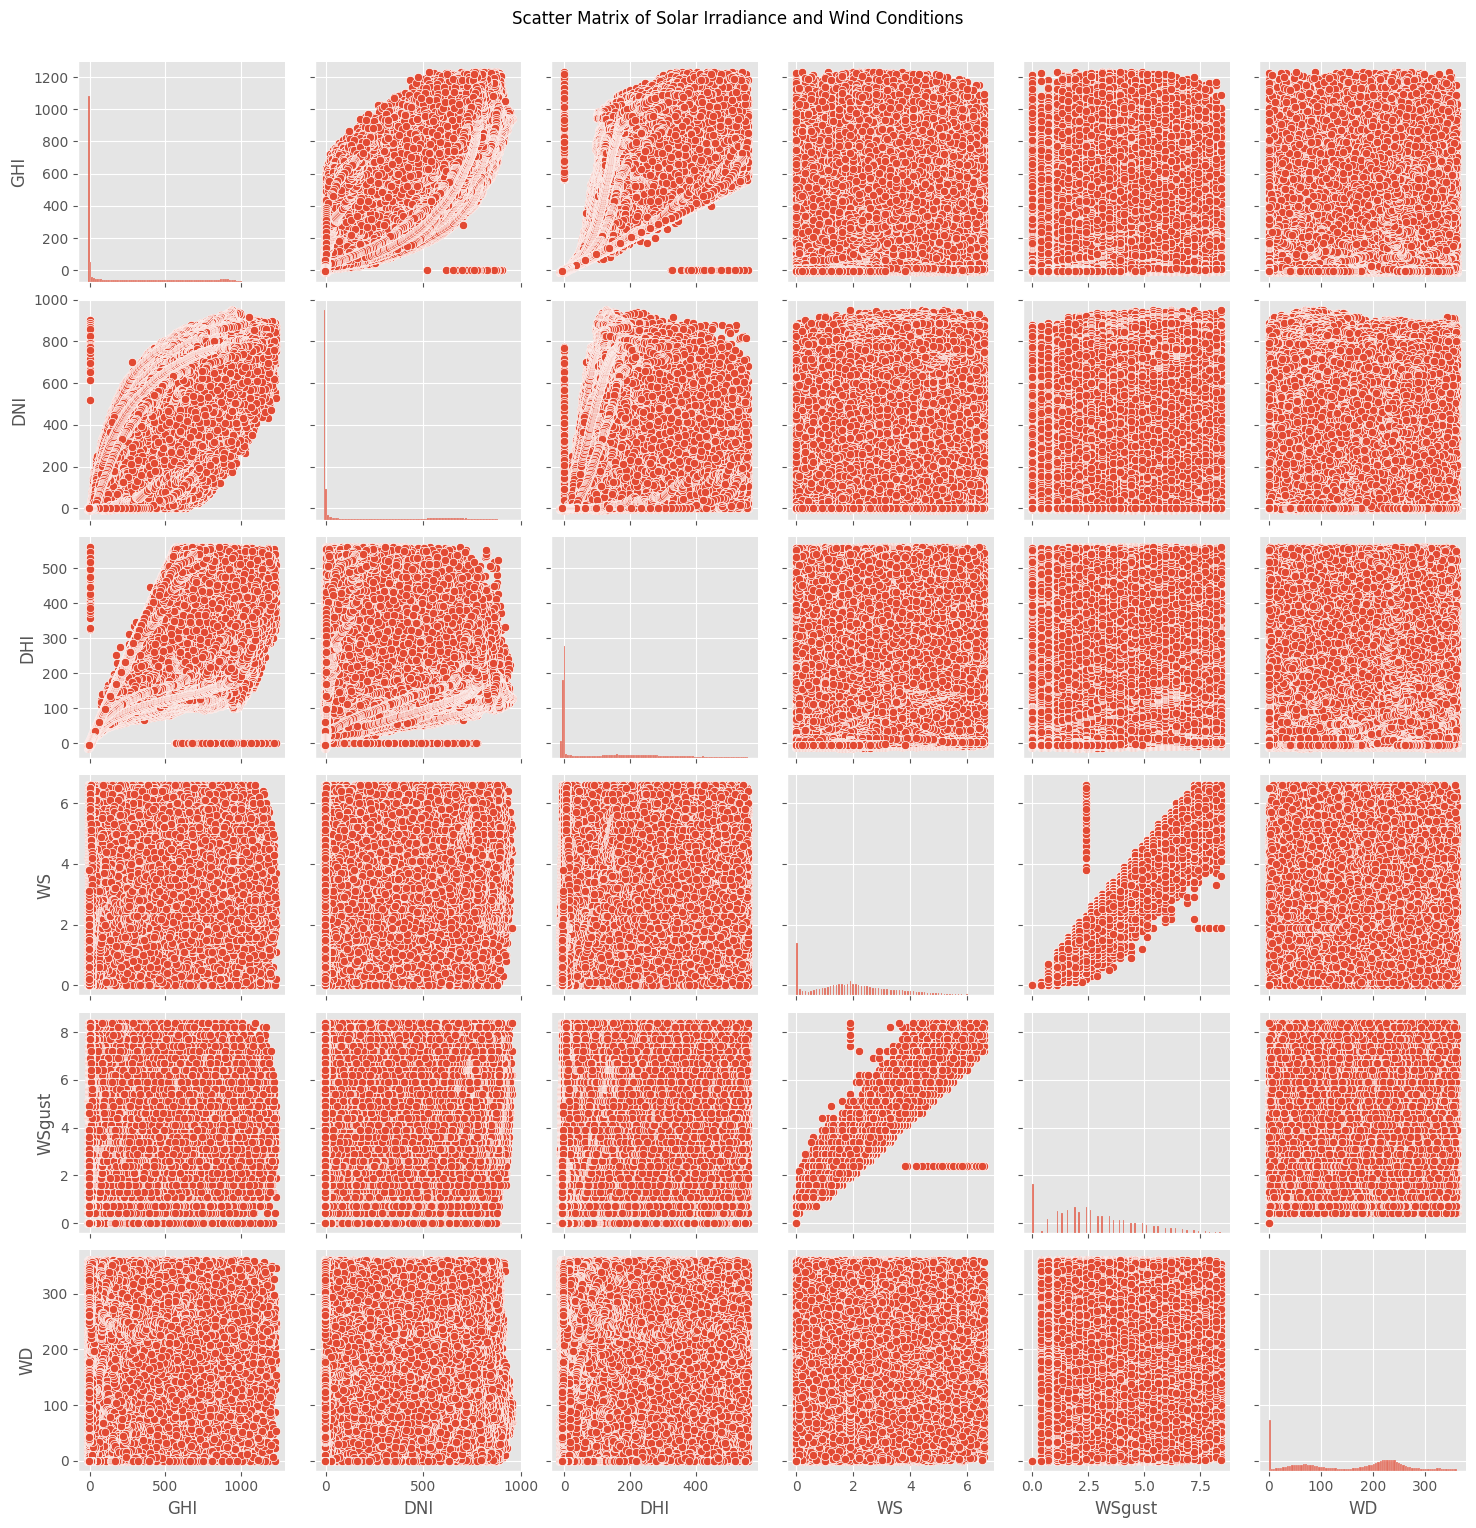

In [51]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation  and Temperature ')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()

In [ ]:
Wind analysis
 investigates the trends and significant wind event by showcasing the distribution of wind speed, direction, and variability of wind direction. It utilizes olar plots to show the trends

C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis\Src\notebooks
C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis


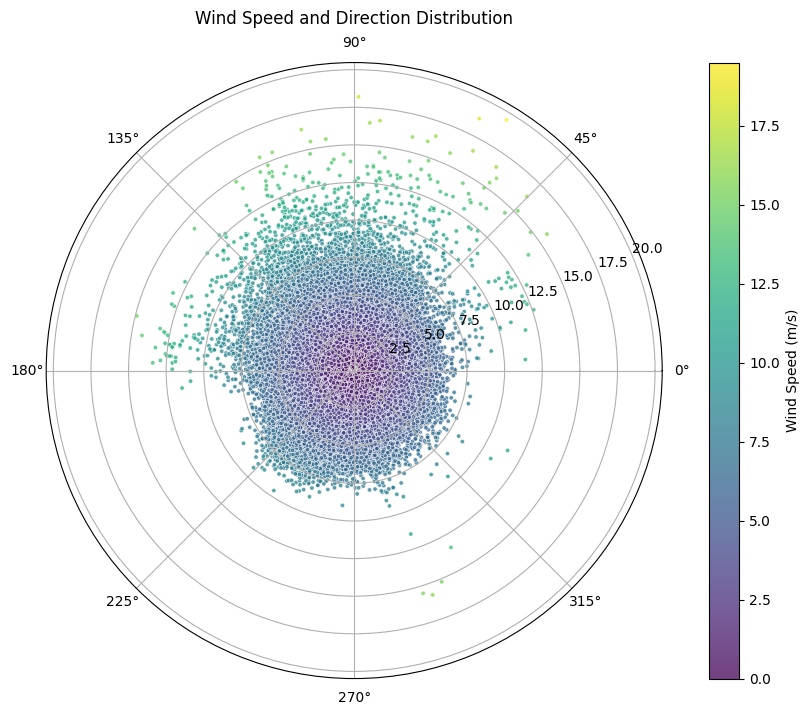

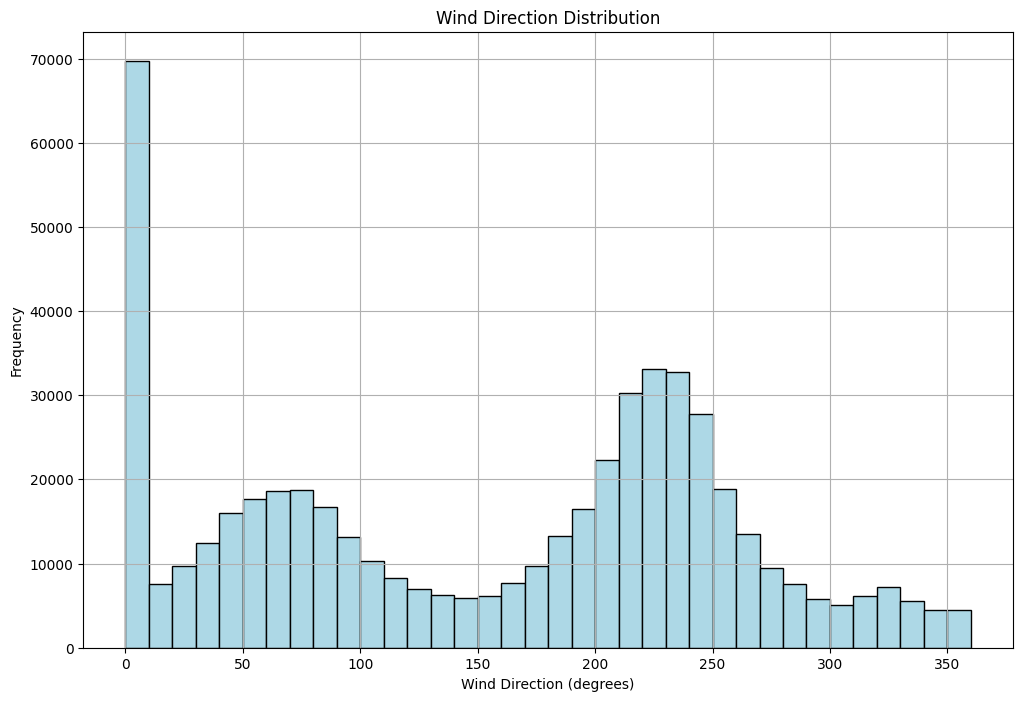

In [8]:
# Ensure you have the relevant columns in the DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print(os.getcwd())
os.chdir(r'C:\Users\Dagi\Documents\KAIM\week 0\solar-farm-data_analysis')
print(os.getcwd())
df = pd.read_csv(r'data\benin-malanville.csv')
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='w', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()



In [ ]:
Temprature analysis

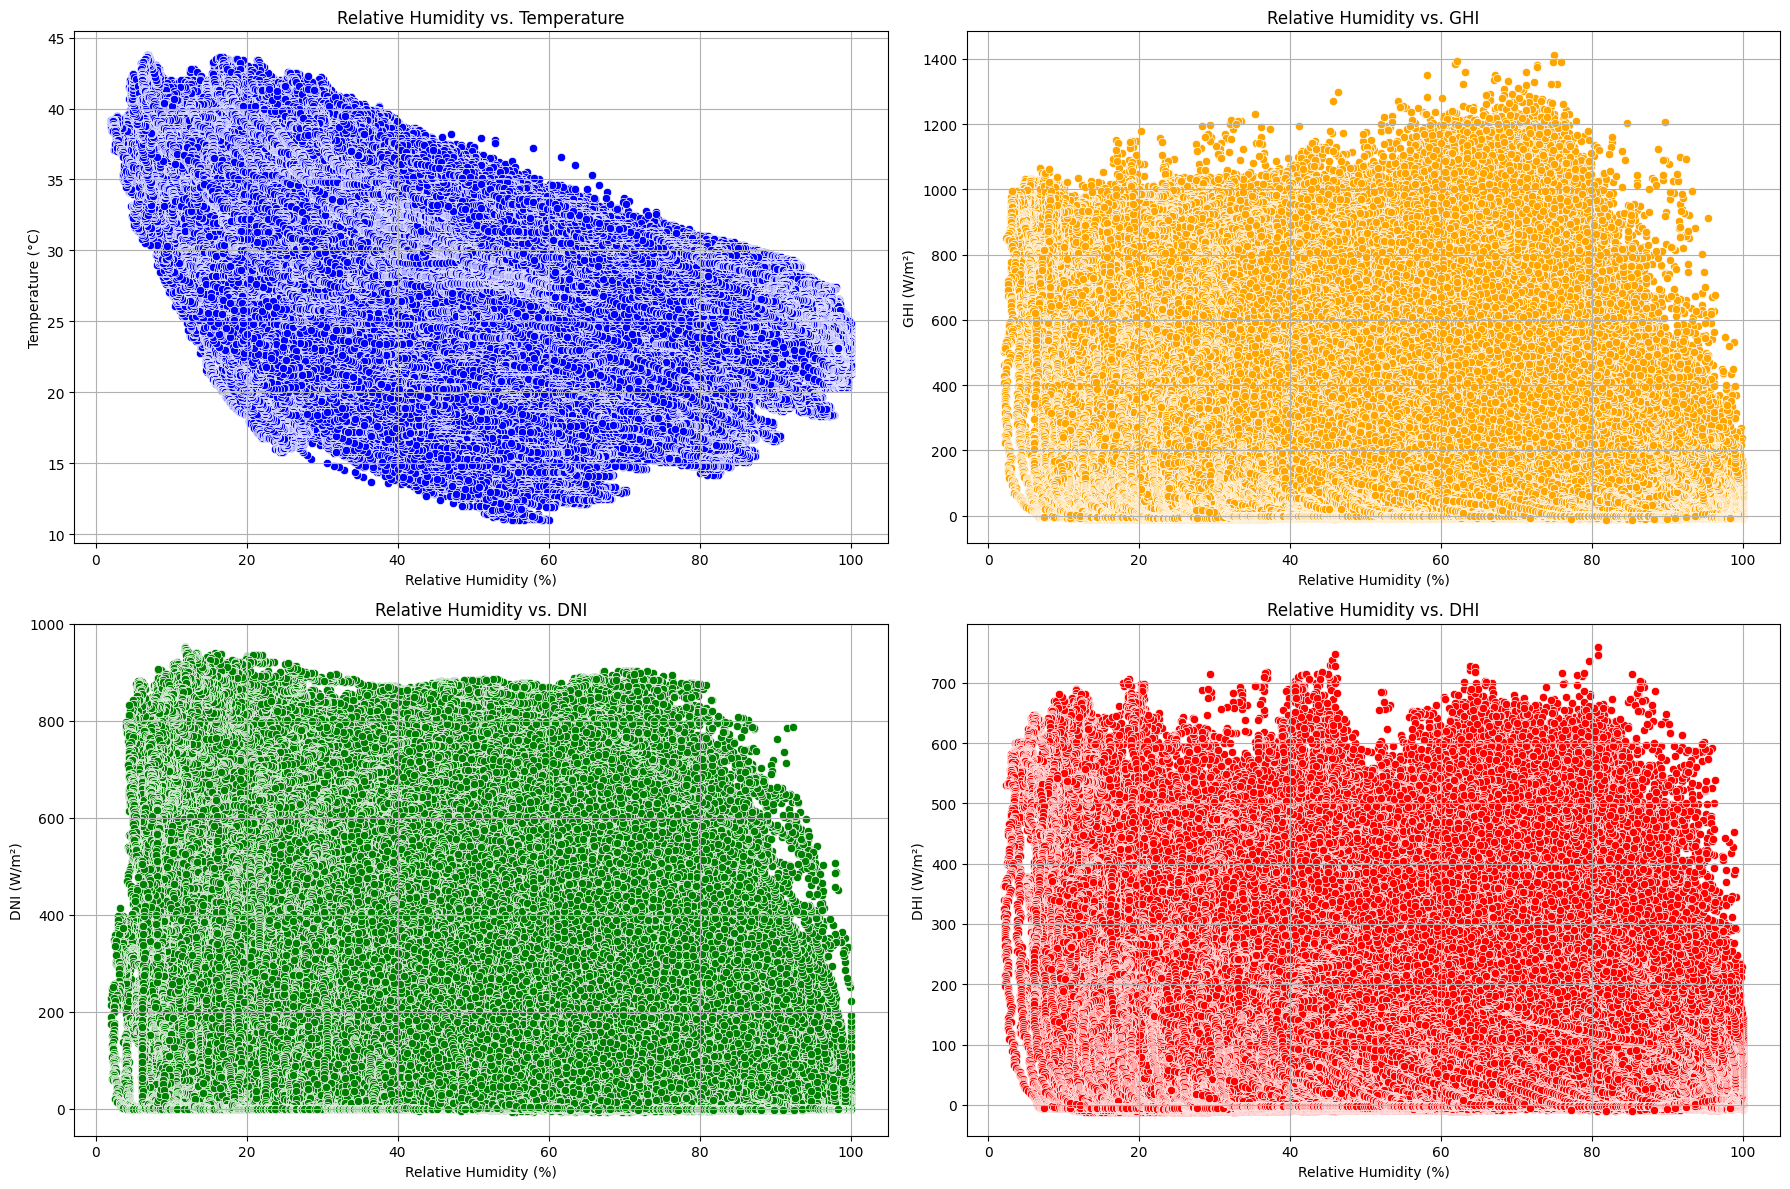

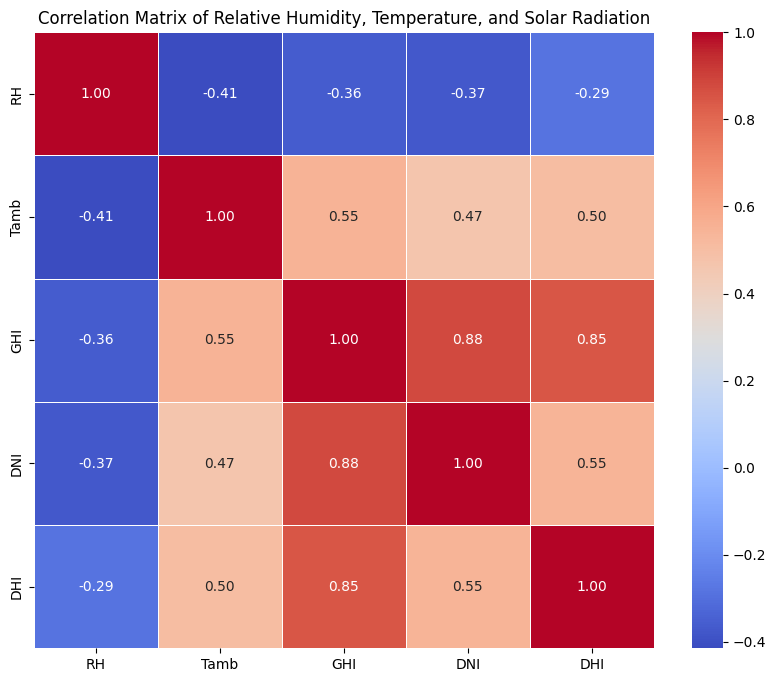

In [9]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()

In [ ]:
Histograms

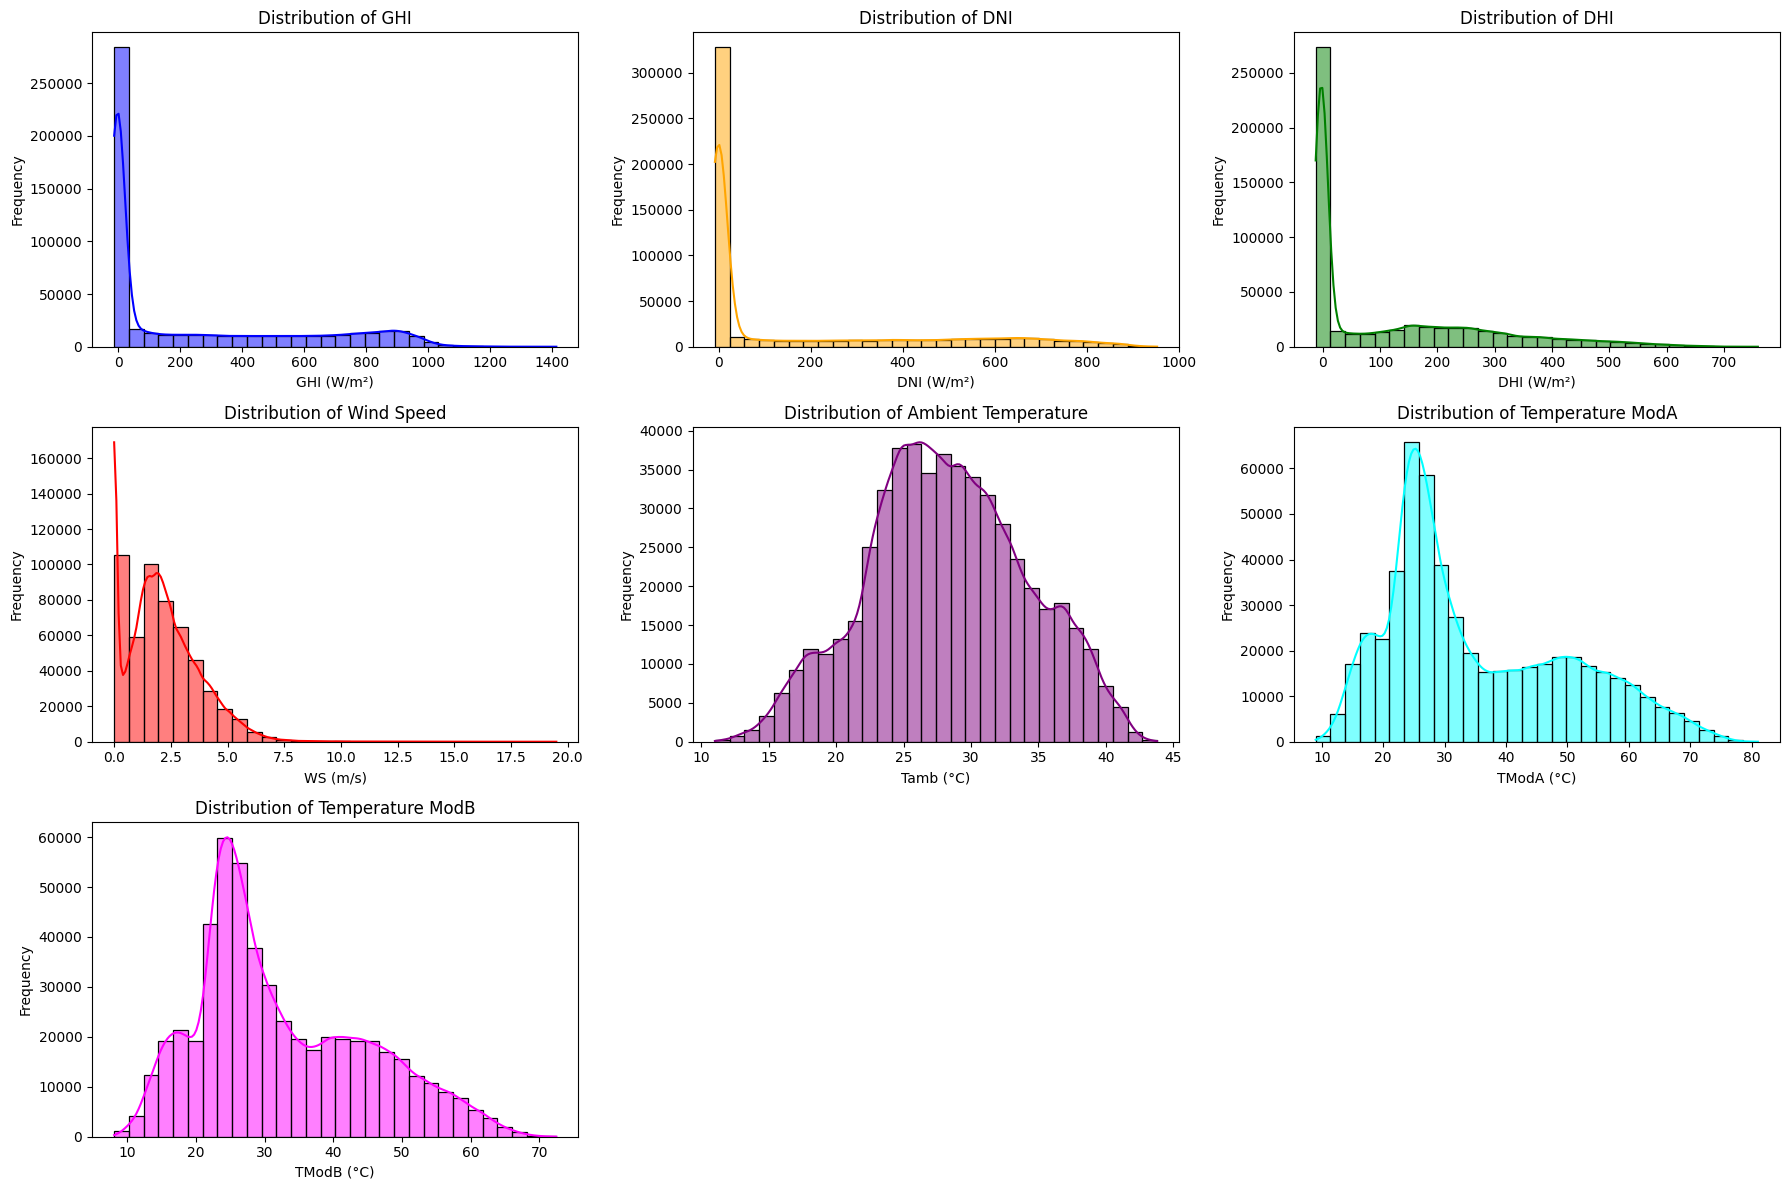

In [10]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='green')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()